# 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/class7/00_온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기'

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1N1s8vhguqw4WIGdcNXcBhWiF00DpHk-W/온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기


In [ ]:
# 보조 라이브러리
import seaborn as sns # 그래프 그리기 위해서
import matplotlib as mpl # seaborn 하기 위해선 기본적으로 필요
import matplotlib.pyplot as plt #실제로 그릴때 필요

# 맷플롯립에서 폰트매지저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null

# 분류적용 파일 불러오기.csv

In [ ]:
df_1 = pd.read_csv('분류적용_last_df.csv',encoding='cp949')

pd.set_option('display.max_columns', None)

In [ ]:
df_1

,지역,측정일,측정나이,년도,년생,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구),workplace_closures(회사 폐쇄),cancel_public_events(공개행사 취소),testing_policy(코로나 검사 정책),facial_coverings(마스크 착용),측정회원성별,체지방율,분류,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력
0,서울,20150107,17.0,2015,1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,23.9,70,158.7,54.1,21.5,34.950522,52.4,49.0,21.3,19.12,0.526,56.178
1,부산,20150108,16.0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M,10.9,80,173.0,53.6,17.9,44.095581,63.4,62.0,9.1,19.00,0.614,52.580
2,서울,20150110,13.0,2015,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,27.2,45,151.4,50.3,21.9,36.631642,39.5,18.0,22.0,23.54,0.427,61.101
3,서울,20150110,18.0,2015,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,25.5,60,162.9,49.3,18.6,34.577796,45.8,37.0,16.6,21.68,0.489,55.691
4,서울,20150113,16.0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,26.2,60,162.4,54.1,20.5,34.819616,39.1,48.0,18.2,18.67,0.576,46.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465306,서울,20220530,18.0,2022,2004,0.0,0.0,0.0,0.0,0.0,3.0,3.0,M,12.6,60,177.9,56.8,17.9,51.700000,66.5,52.0,11.4,17.33,0.551,52.923
465307,전북,20220530,16.0,2022,2006,0.0,0.0,0.0,0.0,0.0,3.0,3.0,M,26.5,15,173.3,71.8,23.9,36.100000,56.5,66.5,-17.9,19.19,0.500,43.389
465308,경기,20220530,18.0,2022,2004,0.0,0.0,0.0,0.0,0.0,3.0,3.0,F,29.8,35,165.5,60.8,22.2,35.800000,46.7,38.0,31.5,19.21,0.505,75.056
465309,광주,20220530,16.0,2022,2006,0.0,0.0,0.0,0.0,0.0,3.0,3.0,F,22.7,80,167.6,61.5,21.9,35.300000,63.6,48.0,13.7,19.86,0.503,54.928


### #바이너리 인코더

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [ ]:
import category_encoders
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

binary_encoder = BinaryEncoder(cols=['측정나이','측정회원성별','지역'])#,'년생','년도']) #,'측정나이','년생','년도'])
df_1 = binary_encoder.fit_transform(df_1)
df_1

,지역_0,지역_1,지역_2,지역_3,지역_4,측정일,측정나이_0,측정나이_1,측정나이_2,년도,년생,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구),workplace_closures(회사 폐쇄),cancel_public_events(공개행사 취소),testing_policy(코로나 검사 정책),facial_coverings(마스크 착용),측정회원성별_0,측정회원성별_1,체지방율,분류,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력
0,0,0,0,0,1,20150107,0,0,1,2015,1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,23.9,70,158.7,54.1,21.5,34.950522,52.4,49.0,21.3,19.12,0.526,56.178
1,0,0,0,1,0,20150108,0,1,0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,10.9,80,173.0,53.6,17.9,44.095581,63.4,62.0,9.1,19.00,0.614,52.580
2,0,0,0,0,1,20150110,0,1,1,2015,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,27.2,45,151.4,50.3,21.9,36.631642,39.5,18.0,22.0,23.54,0.427,61.101
3,0,0,0,0,1,20150110,1,0,0,2015,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,25.5,60,162.9,49.3,18.6,34.577796,45.8,37.0,16.6,21.68,0.489,55.691
4,0,0,0,0,1,20150113,0,1,0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,26.2,60,162.4,54.1,20.5,34.819616,39.1,48.0,18.2,18.67,0.576,46.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465306,0,0,0,0,1,20220530,1,0,0,2022,2004,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1,0,12.6,60,177.9,56.8,17.9,51.700000,66.5,52.0,11.4,17.33,0.551,52.923
465307,0,1,0,1,1,20220530,0,1,0,2022,2006,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1,0,26.5,15,173.3,71.8,23.9,36.100000,56.5,66.5,-17.9,19.19,0.500,43.389
465308,0,0,0,1,1,20220530,1,0,0,2022,2004,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,1,29.8,35,165.5,60.8,22.2,35.800000,46.7,38.0,31.5,19.21,0.505,75.056
465309,0,1,1,1,0,20220530,0,1,0,2022,2006,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,1,22.7,80,167.6,61.5,21.9,35.300000,63.6,48.0,13.7,19.86,0.503,54.928


In [ ]:
df_1

,지역_0,지역_1,지역_2,지역_3,지역_4,측정일,측정나이_0,측정나이_1,측정나이_2,년도,년생,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구),workplace_closures(회사 폐쇄),cancel_public_events(공개행사 취소),testing_policy(코로나 검사 정책),facial_coverings(마스크 착용),측정회원성별_0,측정회원성별_1,체지방율,분류,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력
0,0,0,0,0,1,20150107,0,0,1,2015,1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,23.9,70,158.7,54.1,21.5,34.950522,52.4,49.0,21.3,19.12,0.526,56.178
1,0,0,0,1,0,20150108,0,1,0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,10.9,80,173.0,53.6,17.9,44.095581,63.4,62.0,9.1,19.00,0.614,52.580
2,0,0,0,0,1,20150110,0,1,1,2015,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,27.2,45,151.4,50.3,21.9,36.631642,39.5,18.0,22.0,23.54,0.427,61.101
3,0,0,0,0,1,20150110,1,0,0,2015,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,25.5,60,162.9,49.3,18.6,34.577796,45.8,37.0,16.6,21.68,0.489,55.691
4,0,0,0,0,1,20150113,0,1,0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,26.2,60,162.4,54.1,20.5,34.819616,39.1,48.0,18.2,18.67,0.576,46.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465306,0,0,0,0,1,20220530,1,0,0,2022,2004,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1,0,12.6,60,177.9,56.8,17.9,51.700000,66.5,52.0,11.4,17.33,0.551,52.923
465307,0,1,0,1,1,20220530,0,1,0,2022,2006,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1,0,26.5,15,173.3,71.8,23.9,36.100000,56.5,66.5,-17.9,19.19,0.500,43.389
465308,0,0,0,1,1,20220530,1,0,0,2022,2004,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,1,29.8,35,165.5,60.8,22.2,35.800000,46.7,38.0,31.5,19.21,0.505,75.056
465309,0,1,1,1,0,20220530,0,1,0,2022,2006,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,1,22.7,80,167.6,61.5,21.9,35.300000,63.6,48.0,13.7,19.86,0.503,54.928


In [ ]:
df_1 = df_1.reset_index(drop=True)

# 거리두기 데이터 PolynomialFeatures

PolynomialFeatures 안쓰는게 더 정확도가 높았다.

1) 거리두기 데이터에만 가중치주고 poly 효과미비
2) 전체 데이터에 poly 진행. 효과미비

In [ ]:
#df_y = df_1[['체지방율']]
#df_X = df_1.drop(columns=['체지방율'])

#from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치

#order = 3
#poly = PolynomialFeatures(degree=order, include_bias=False)
#poly.fit(df_X)
#df_tt = poly.transform(df_X) # poly 변환 후 결과가 ndarray format임.
#df_X = pd.concat([df_X,pd.DataFrame(df_tt)], axis=1)

In [ ]:
# df_1['school_closures(학교 폐쇄)']= (df_1['school_closures(학교 폐쇄)']+1)*20
# df_1['restriction_gatherings(모임 제한)']=(df_1['restriction_gatherings(모임 제한)']+1)*10
# df_1['stay_home_requirements(재택 요구)']=(df_1['stay_home_requirements(재택 요구)']+1)*5

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치

# order = 3
# poly = PolynomialFeatures(degree=order, include_bias=False)
# poly.fit(df_1[['school_closures(학교 폐쇄)','restriction_gatherings(모임 제한)','stay_home_requirements(재택 요구)']])
# df_tt = poly.transform(df_1[['school_closures(학교 폐쇄)','restriction_gatherings(모임 제한)','stay_home_requirements(재택 요구)']]) # poly 변환 후 결과가 ndarray format임.
# df_tt
# df_1 = pd.concat([df_1,pd.DataFrame(df_tt)], axis=1)
# df_1 = df_1.drop(columns=['school_closures(학교 폐쇄)','restriction_gatherings(모임 제한)','stay_home_requirements(재택 요구)'])

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 134 kB/s 


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# df_X, df_y 정의

# 현재까지 가장 좋은 모델 출력

2015년-2022년 데이터셋

X : '지역_0', '지역_1', '지역_2', '지역_3', '지역_4', '측정나이_0', '측정나이_1', '측정나이_2',
       '년도', '년생', 'school_closures(학교 폐쇄)', 'restriction_gatherings(모임 제한)',
       'stay_home_requirements(재택 요구)', 'workplace_closures(회사 폐쇄)',
       'cancel_public_events(공개행사 취소)', 'testing_policy(코로나 검사 정책)',
       'facial_coverings(마스크 착용)', '측정회원성별_0', '측정회원성별_1', '신장', '체중', 'BMI',
       '심폐지구력', '근력', '근지구력', '유연성', '민첩성', '순발력', '협응력'

y : 체지방률

# 여기서부터 테스트 다시 시작!!

In [ ]:
df_1['측정일'].head()
#train1
train = df_1[df_1['측정일'] < 20220101]
test = df_1[df_1['측정일'] >= 20220101]

#train2
# train = df_1[df_1['측정일'] < 20210101]
# test = df_1[df_1['측정일'] >= 20220101]

#train3
# train = df_1[df_1['측정일'] < 20200101]
# test = df_1[df_1['측정일'] >= 20220101]

#train4
# train = df_1[(df_1['측정일'] < 20220101) & (df_1['측정일'] > 20180101)]
# test = df_1[df_1['측정일'] >= 20220101]
# test.head()

#train5 - 코로나 시기만
# train = df_1[(df_1['측정일'] < 20220101) & (df_1['측정일'] > 20200101)]
# test = df_1[df_1['측정일'] >= 20220101]

In [ ]:
train_y = train[['체지방율']]
train_X = train.drop(columns=['체지방율','분류','측정일'])
test_y = test[['체지방율']]
test_X = test.drop(columns=['체지방율','분류','측정일'])

In [ ]:
train_X

,지역_0,지역_1,지역_2,지역_3,지역_4,측정나이_0,측정나이_1,측정나이_2,년도,년생,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구),workplace_closures(회사 폐쇄),cancel_public_events(공개행사 취소),testing_policy(코로나 검사 정책),facial_coverings(마스크 착용),측정회원성별_0,측정회원성별_1,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력
0,0,0,0,0,1,0,0,1,2015,1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,158.7,54.1,21.5,34.950522,52.4,49.0,21.3,19.12,0.526,56.178
1,0,0,0,1,0,0,1,0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,173.0,53.6,17.9,44.095581,63.4,62.0,9.1,19.00,0.614,52.580
2,0,0,0,0,1,0,1,1,2015,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,151.4,50.3,21.9,36.631642,39.5,18.0,22.0,23.54,0.427,61.101
3,0,0,0,0,1,1,0,0,2015,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,162.9,49.3,18.6,34.577796,45.8,37.0,16.6,21.68,0.489,55.691
4,0,0,0,0,1,0,1,0,2015,1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,162.4,54.1,20.5,34.819616,39.1,48.0,18.2,18.67,0.576,46.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419550,0,1,1,0,0,0,1,1,2021,2008,1.0,4.0,0.0,2.0,1.0,3.0,3.0,0,1,156.7,68.3,27.8,33.100000,38.9,24.0,16.5,22.53,0.502,51.104
419551,0,1,1,0,0,0,1,1,2021,2008,1.0,4.0,0.0,2.0,1.0,3.0,3.0,0,1,160.3,76.4,29.7,34.200000,28.0,22.0,25.3,24.69,0.427,55.272
419552,0,0,0,0,1,0,0,1,2021,2004,1.0,4.0,0.0,2.0,1.0,3.0,3.0,1,0,167.4,58.9,21.0,24.900000,82.9,50.0,30.0,17.32,0.601,34.578
419553,0,0,0,0,1,0,0,1,2021,2004,1.0,4.0,0.0,2.0,1.0,3.0,3.0,1,0,183.2,71.9,21.4,35.600000,68.2,49.0,25.0,18.60,0.552,36.932


### standard 스케일러

In [ ]:
train_X.columns

Index(['지역_0', '지역_1', '지역_2', '지역_3', '지역_4', '측정나이_0', '측정나이_1', '측정나이_2',
       '년도', '년생', 'school_closures(학교 폐쇄)', 'restriction_gatherings(모임 제한)',
       'stay_home_requirements(재택 요구)', 'workplace_closures(회사 폐쇄)',
       'cancel_public_events(공개행사 취소)', 'testing_policy(코로나 검사 정책)',
       'facial_coverings(마스크 착용)', '측정회원성별_0', '측정회원성별_1', '신장', '체중', 'BMI',
       '심폐지구력', '근력', '근지구력', '유연성', '민첩성', '순발력', '협응력'],
      dtype='object')

In [ ]:
col1 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중']
# col2 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중', 
#         윗몸말아올리기, 반복점프, '협응력', 20m왕복]
col3 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중']
# df.rename(columns={'왕복오래달리기(VO₂max)':'심폐지구력',
#                    '상대악력(%)':'근력',
#                    '반복점프':'근지구력',
#                    '앉아윗몸앞으로굽히기(cm)':'유연성',
#                    '일리노이':'민첩성',
#                    '체공시간':'순발력',
#                    '협응력시간':'협응력'}, inplace = True)
train_X = train_X[col1]
test_X = test_X[col1]

In [ ]:
#standard 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치

standard_scaler = StandardScaler()

In [ ]:
# standard스케일러

train_X_standard_scaler = standard_scaler.fit_transform(train_X)
train_X_standard_scaler = pd.DataFrame(train_X_standard_scaler, columns=[col for col in train_X.columns])
test_X_standard_scaler = standard_scaler.transform(test_X)
test_X_standard_scaler = pd.DataFrame(test_X_standard_scaler, columns=[col for col in test_X.columns])
test_X_standard_scaler.head()

,지역_0,지역_1,지역_2,지역_3,지역_4,년생,측정나이_0,측정나이_1,측정나이_2,측정회원성별_0,측정회원성별_1,신장,체중
0,-0.22279,-0.838164,1.151275,0.978641,0.939276,2.041820,1.152614,0.888013,-1.048073,0.896424,-0.896424,1.126161,1.886567
1,-0.22279,-0.838164,1.151275,0.978641,0.939276,2.041820,1.152614,0.888013,-1.048073,0.896424,-0.896424,1.654801,0.836266
2,-0.22279,1.193084,-0.868602,-1.021825,-1.064650,0.643739,1.152614,-1.126109,-1.048073,0.896424,-0.896424,-0.577232,-0.040144
3,-0.22279,-0.838164,1.151275,-1.021825,0.939276,0.643739,1.152614,-1.126109,-1.048073,0.896424,-0.896424,0.703250,0.648464
4,-0.22279,-0.838164,1.151275,0.978641,0.939276,2.041820,1.152614,0.888013,-1.048073,0.896424,-0.896424,-0.354029,0.307638


In [ ]:
# polynomialFeatures 적용
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치

order = 2
poly = PolynomialFeatures(degree=order, include_bias=False)
poly.fit(train_X_standard_scaler)
train_X_standard_scaler = pd.DataFrame(poly.transform(train_X_standard_scaler)) # poly 변환 후 결과가 ndarray format임.
test_X_standard_scaler = pd.DataFrame(poly.transform(test_X_standard_scaler)) # poly 변환 후 결과가 ndarray format임.

### Catboost 모델

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# train_X, valid_X, train_y, valid_y = train_test_split(df_X_standard_scaler, df_y, train_size=0.8, test_size = 0.2, random_state= 3766)

from catboost import CatBoostRegressor

cb_model = CatBoostRegressor()
cb_model.fit(train_X_standard_scaler, train_y)

In [ ]:
pred_train = cb_model.predict(train_X_standard_scaler)
pred_test = cb_model.predict(test_X_standard_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler  # 표준 척도구성 장치

metrics = []

for y, pred_y in [(train_y, pred_train), (test_y, pred_test)]:
    MAE = mean_absolute_error(y, pred_y)
    MSE = mean_squared_error(y, pred_y)
    RMSE = np.sqrt(mean_squared_error(y, pred_y))
    R2 = r2_score(y, pred_y)
    metrics.append((MAE, MSE, RMSE, R2))

pd.DataFrame({'train':metrics[0], 'test':metrics[1]}, index=['MAE', 'MSE', 'RMSE', 'R2'])

--- 
# 여기까지!!

In [ ]:
# 사이킷런으로 저장한 모형을 저장하고 적재할 때 쓰는 함수
# from sklearn.externals import joblib
import joblib

# 모형 저장하기 
joblib.dump(cb_model, "/content/gdrive/MyDrive/class7/온반오반/data/cb_model_1.pkl")



['/content/gdrive/MyDrive/class7/온반오반/data/cb_model_1.pkl']

In [ ]:
import joblib
cb_model_load = joblib.load("/content/gdrive/MyDrive/class7/온반오반/data/cb_model_1.pkl")

# A모델-E모델 : 

15년 데이터셋으로 train -> 15, 16,17,18,19,20,21,22,22년 예측

15-16년 데이터셋으로 train -> 15, 16,17,18,19,20,21,22,22년 예측

...



In [ ]:
df_1[['측정일']]

,측정일
0,20150107
1,20150108
2,20150110
3,20150110
4,20150113
...,...
465306,20220530
465307,20220530
465308,20220530
465309,20220530


In [ ]:
df_1

,지역_0,지역_1,지역_2,지역_3,지역_4,측정일,측정나이_0,측정나이_1,측정나이_2,년도,...,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력
0,0,0,0,0,1,20150107,0,0,1,2015,...,158.7,54.1,21.5,34.950522,52.4,49.0,21.3,19.12,0.526,56.178
1,0,0,0,1,0,20150108,0,1,0,2015,...,173.0,53.6,17.9,44.095581,63.4,62.0,9.1,19.00,0.614,52.580
2,0,0,0,0,1,20150110,0,1,1,2015,...,151.4,50.3,21.9,36.631642,39.5,18.0,22.0,23.54,0.427,61.101
3,0,0,0,0,1,20150110,1,0,0,2015,...,162.9,49.3,18.6,34.577796,45.8,37.0,16.6,21.68,0.489,55.691
4,0,0,0,0,1,20150113,0,1,0,2015,...,162.4,54.1,20.5,34.819616,39.1,48.0,18.2,18.67,0.576,46.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465306,0,0,0,0,1,20220530,1,0,0,2022,...,177.9,56.8,17.9,51.700000,66.5,52.0,11.4,17.33,0.551,52.923
465307,0,1,0,1,1,20220530,0,1,0,2022,...,173.3,71.8,23.9,36.100000,56.5,66.5,-17.9,19.19,0.500,43.389
465308,0,0,0,1,1,20220530,1,0,0,2022,...,165.5,60.8,22.2,35.800000,46.7,38.0,31.5,19.21,0.505,75.056
465309,0,1,1,1,0,20220530,0,1,0,2022,...,167.6,61.5,21.9,35.300000,63.6,48.0,13.7,19.86,0.503,54.928


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치

class Models:
  def __init__(self, train_year, df_1):
    self.valid = []
    self.valid_X = []
    self.valid_y = []
    self.pred_values = []
    self.year = []
    self.train = []
    self.train_year = train_year * 10000
    self.df_1 = df_1
    self.count=0

    self.valid_X_scaler = []
    self.train_MAE = []
    self.train_MSE = []
    self.train_RMSE = []
    self.train_R2 = []

    self.temp_result = []
    print(train_year)
    self.train = self.df_1[self.df_1['측정일'] < self.train_year]

    for i in range(self.train_year,20230000,10000):
      self.valid.append(self.df_1[(self.df_1['측정일'] > i) & (self.df_1['측정일'] < i+10000)])

    self.Target = ['체지방율']
    self.Drop_X = ['체지방율','분류','측정일']#,'심폐지구력','근력','근지구력','유연성','민첩성','순발력','협응력']

    self.df_y = self.train[self.Target]
    self.df_X = self.train.drop(columns=self.Drop_X)

    for j in self.valid:
      self.valid_y.append(j[self.Target])
      self.valid_X.append(j.drop(columns=self.Drop_X))

    standard_scaler = StandardScaler()
    self.df_X_standard_scaler = standard_scaler.fit_transform(self.df_X)
    self.df_X_standard_scaler = pd.DataFrame(self.df_X_standard_scaler, columns=[col for col in self.df_X.columns])

    self.cb_model = CatBoostRegressor(random_state=3515)


    ### 코로나 시즌 예측
    # standard스케일러
    for k in self.valid_X:
      self.valid_X_scaler.append(standard_scaler.fit_transform(k))

    count = 0
    for l in self.valid_X_scaler:
      self.valid_X[count] = pd.DataFrame(l, columns=[col for col in self.valid_X[count].columns])
      count= count+1

    #pd.DataFrame(valid_X[2])


    # 2015년-2019년 train:80%, valid:20%
    self.train_X, self.valid_XX, self.train_y, self.valid_yy = train_test_split(self.df_X_standard_scaler, self.df_y, train_size=0.8, test_size = 0.2, random_state= 4237)


  def model_train(self):
    from catboost import CatBoostRegressor

    
    self.cb_model.fit(self.train_X, self.train_y,
            early_stopping_rounds=20
            )
    self.pred_value_train_X = self.cb_model.predict(self.train_X)
    self.pred_value = self.cb_model.predict(self.valid_XX)

    #model_train(20160000)

    self.train_MAE.append(mean_absolute_error(self.train_y, self.pred_value_train_X))
    self.train_MSE.append(mean_squared_error(self.train_y, self.pred_value_train_X))
    self.train_RMSE.append(np.sqrt(mean_squared_error(self.train_y, self.pred_value_train_X)))
    self.train_R2.append(r2_score(self.train_y, self.pred_value_train_X))

    self.train_MAE.append(mean_absolute_error(self.valid_yy, self.pred_value))
    self.train_MSE.append(mean_squared_error(self.valid_yy, self.pred_value))
    self.train_RMSE.append(np.sqrt(mean_squared_error(self.valid_yy, self.pred_value)))
    self.train_R2.append(r2_score(self.valid_yy, self.pred_value))

    self.temp_result=pd.DataFrame([[self.train_MAE[0], self.train_MSE[0], self.train_RMSE[0], self.train_R2[0]]], columns=['MAE', 'MSE', 'RMSE', 'R2'], index=['train'])
    self.temp_result=pd.concat([self.temp_result, pd.DataFrame([[self.train_MAE[1], self.train_MSE[1], self.train_RMSE[1], self.train_R2[1]]], columns=['MAE', 'MSE', 'RMSE', 'R2'], index=['valid'])] ,axis=0)


    for i in self.valid_X:
      self.pred_values.append(self.cb_model.predict(i))

    count = 0
    for i in self.pred_values:
      self.train_MAE.append(mean_absolute_error(self.valid_y[count], i))
      self.train_MSE.append(mean_squared_error(self.valid_y[count], i))
      self.train_RMSE.append(np.sqrt(mean_squared_error(self.valid_y[count], i)))
      self.train_R2.append(r2_score(self.valid_y[count], i))

      #temp_result = pd.concat(temp_result, 
      self.temp_result=pd.concat([self.temp_result, pd.DataFrame([[self.train_MAE[-1], self.train_MSE[-1], self.train_RMSE[-1], self.train_R2[-1]]], columns=['MAE', 'MSE', 'RMSE', 'R2'], index=[self.train_year/10000 + count])] ,axis=0)
      count = count+1

    return self.temp_result

In [ ]:
model_2016 = Models(2016,df_1)
model_2017 = Models(2017,df_1)
model_2018 = Models(2018,df_1)
model_2019 = Models(2019,df_1)
model_2020 = Models(2020,df_1)
model_2021 = Models(2021,df_1)
model_2022 = Models(2022,df_1)
models = [model_2016, model_2017, model_2018, model_2019, model_2020, model_2021, model_2022]

for i in range(len(models)):
 models[i].model_train()

In [ ]:
models[0].temp_result

,MAE,MSE,RMSE,R2
train,2.338498,9.318612,3.052640,0.895351
valid,2.814478,13.706841,3.702275,0.851134
2016.0,3.015459,15.790138,3.973681,0.824923
2017.0,3.116558,16.201759,4.025141,0.813719
2018.0,3.149460,16.501280,4.062177,0.811873
2019.0,3.084261,15.508326,3.938061,0.826694
2020.0,3.261393,17.132266,4.139114,0.813091
2021.0,3.648562,20.550083,4.533220,0.776111
2022.0,3.775715,21.818086,4.670983,0.759677


In [ ]:
models[1].temp_result

,MAE,MSE,RMSE,R2
train,2.547219,11.288741,3.359872,0.875070
valid,2.747420,13.486103,3.672343,0.849484
2017.0,2.893193,14.373895,3.791292,0.834735
2018.0,2.945087,14.765666,3.842612,0.831661
2019.0,2.869810,13.657244,3.695571,0.847380
2020.0,3.145594,16.034012,4.004249,0.825073
2021.0,3.446257,18.600617,4.312843,0.797350
2022.0,3.701492,21.106166,4.594145,0.767519


In [ ]:
models[2].temp_result

,MAE,MSE,RMSE,R2
train,2.618653,11.784829,3.432904,0.867328
valid,2.734513,12.959909,3.599987,0.854674
2018.0,2.886764,14.243595,3.774069,0.837613
2019.0,2.794898,13.001817,3.605803,0.854705
2020.0,3.002370,14.751756,3.840802,0.839062
2021.0,3.350012,17.646594,4.200785,0.807744
2022.0,3.617703,20.215128,4.496124,0.777334


In [ ]:
models[3].temp_result

,MAE,MSE,RMSE,R2
train,2.660843,12.183962,3.490553,0.862254
valid,2.742942,12.884168,3.589452,0.854374
2019.0,2.716283,12.344437,3.513465,0.862051
2020.0,2.885706,13.694897,3.700662,0.850592
2021.0,3.231548,16.576333,4.071404,0.819404
2022.0,3.472634,18.827395,4.339055,0.792619


In [ ]:
models[4].temp_result

,MAE,MSE,RMSE,R2
train,2.630803,11.890364,3.448241,0.865862
valid,2.683767,12.450026,3.528459,0.860952
2020.0,2.808874,13.058647,3.613675,0.857534
2021.0,3.053127,14.955285,3.867206,0.837065
2022.0,3.256290,16.812319,4.100283,0.814815


In [ ]:
models[5].temp_result

,MAE,MSE,RMSE,R2
train,2.627061,11.849682,3.442337,0.866652
valid,2.692269,12.560975,3.544147,0.859064
2021.0,3.041659,14.859809,3.854842,0.838105
2022.0,3.245374,16.715703,4.088484,0.815879


In [ ]:
models[6].temp_result

,MAE,MSE,RMSE,R2
train,2.627549,11.835453,3.440269,0.867325
valid,2.672515,12.387062,3.519526,0.861724
2022.0,3.148869,15.849995,3.981205,0.825415


In [ ]:
range(len(models[0].train_MAE))

range(0, 9)

#### 분류 추가해서 히스토그램 그려보기

체지방률 분류하기

In [ ]:
# 맷플롯립을 가져온다.
import matplotlib as mpl

# 맷플롯립에서 pyplot라는 서브패키지(모듈)를 가져온다.
import matplotlib.pyplot as plt

# 넘파이를 가져온다. 
import numpy as np

In [ ]:
# 맷플롯립에서 폰트매니저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm

In [ ]:
# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null

In [ ]:
# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)

# 파이플롯에서 사용할 글꼴만 지정하고 싶다면 위 문장 대신 아래 문장 사용
plt.rc('font', family='NanumSquareRound') 

fm._rebuild()

In [ ]:
models

In [ ]:
for i in range(len(models)):
  for j in range(len(models[i].valid_X)):
   print(i,j)
#   models[i].valid_X[j]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
4 0
4 1
4 2
5 0
5 1
6 0


In [ ]:
%cd '/content/gdrive/MyDrive/class7/온반오반/data'

df_fat = pd.read_csv('fat2.csv')

df_fat.rename(columns = {'성별':'측정회원성별',
                         '나이':'측정나이',
                         '체지방률':'예측_체지방율',
                         '분류':'예측값_분류'}, inplace = True)

/content/gdrive/MyDrive/class7/온반오반/data


In [ ]:
def cal(a):
    '''
    a = '분류' 값을 대입할 데이터 프레임(한 행씩 가져옴)
    temp = '분류' 컬럼의 값을 선정하기 위한 조건
    df_fat = 분류 조건 데이터 프레임
    
    temp = '측정회원성별' 관련 조건
    temp = '측정회원성별' + '측정나이' 관련 조건
    조건문
    if a의 체지방율이 temp의 가장 낮은 체지방율보다도 낮을 경우
        temp = '측정회원성별' + '측정나이' 조건에서 가장 낮은 체지방율에 해당하는 '분류' 값(100)
    else 그 외의 경우
        temp = '측정회원성별' + '측정나이' + '체지방율' 조건에 맞는 '분류' 값
    return '측정회원성별', '측정나이', '체지방율' 조건에 맞는 '분류' 값
    '''
    temp = df_fat[df_fat['측정회원성별'] == a['측정회원성별']]
    temp = temp[temp['측정나이'] == a['측정나이']]
    if (a['예측'] < temp['예측_체지방율'].iloc[0]):
        temp = temp['예측값_분류'].iloc[0]
    else:
        temp = temp[temp['예측_체지방율'] <= a['예측']].iloc[-1,:]
        temp = temp['예측값_분류']
    return temp

#model=model_2016
def pred_classification(model, temp):
  original_df2 = binary_encoder.inverse_transform(df_1)
  original_df2.loc[model.valid_X[0].index]
  temp=original_df2.loc[model.valid_X[0].index].reset_index(drop=True)[['측정나이','측정회원성별','체지방율','분류']]

  #예측값 분류를 시행하기 위해, 나이,성별 을 포함시킨다.
  temp=pd.concat([temp, pd.DataFrame(model.pred_values[0],columns=['예측'])], axis=1)
  temp['예측값_분류'] = np.nan

  # 함수가 제대로 작동하는지 확인
  cal(temp.iloc[0,:])
  # apply 적용 (axis = 1 -> 열)
  temp['예측값_분류'] = temp.apply(cal, axis = 1)
  # 결측치 제거 확인
  temp['예측값_분류'].isnull().sum()

  temp['비만판정_차이'] = temp['분류'] - temp['예측값_분류']
  temp['체지방율_차이'] = temp['체지방율'] - temp['예측']
  temp.sort_values(by = '비만판정_차이', ascending=True)
  return temp

In [ ]:
temp = [[],[],[],[],[],[],[]]
for i in range(len(models)):
   print(i)
   temp[i]=pred_classification(models[i], temp[i])

0
1
2
3
4
5
6


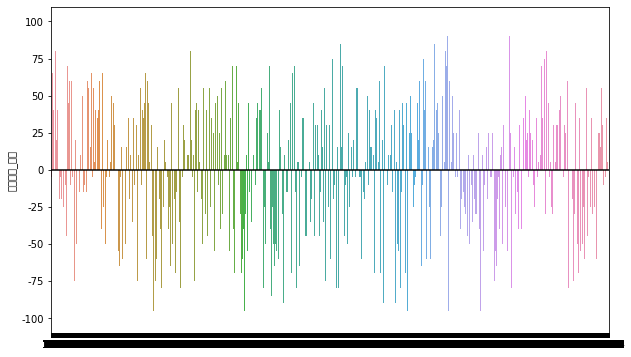

In [ ]:
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.barplot(ax=ax, x=temp[0]['비만판정_차이'].index, y='비만판정_차이', data=temp[0])
ax.axhline(0, color='k')
plt.savefig('체지방율_측정_예측_차이.png', bbox_inches='tight')
plt.show()

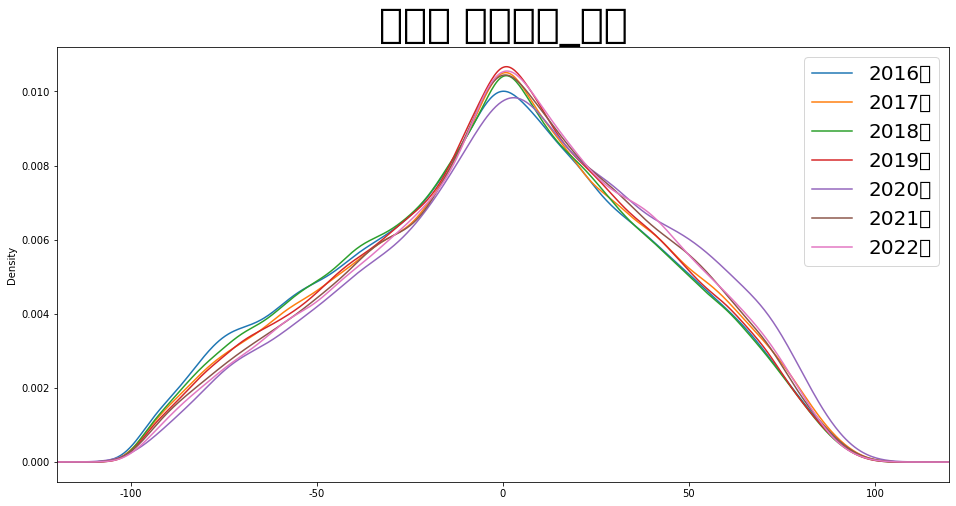

In [ ]:
plt.figure(figsize=(16, 8))
temp[0]['비만판정_차이'].plot.kde(label = '2016년')
temp[1]['비만판정_차이'].plot.kde(label = '2017년')
temp[2]['비만판정_차이'].plot.kde(label = '2018년')
temp[3]['비만판정_차이'].plot.kde(label = '2019년')
temp[4]['비만판정_차이'].plot.kde(label = '2020년')
temp[5]['비만판정_차이'].plot.kde(label = '2021년')
temp[6]['비만판정_차이'].plot.kde(label = '2022년', figsize=(16, 8))
plt.xlim([-120, 120])
plt.title("년도별 비만판정_차이", fontsize = 40)
plt.legend(fontsize = 20)
plt.show()

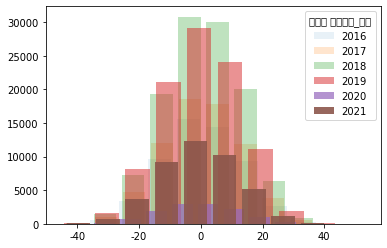

In [ ]:
plt.hist(temp[0]['체지방율_차이'][], rwidth=0.8, alpha=0.1, label='2016')
plt.hist(temp[1]['체지방율_차이'], rwidth=0.8, alpha=0.2, label='2017' )
plt.hist(temp[2]['체지방율_차이'], rwidth=0.8, alpha=0.3, label='2018' )
plt.hist(temp[3]['체지방율_차이'], rwidth=0.8, alpha=0.5, label='2019' )
plt.hist(temp[4]['체지방율_차이'], rwidth=0.8, alpha=0.7, label='2020' )
plt.hist(temp[5]['체지방율_차이'], rwidth=0.8, alpha=0.9, label='2021' )
plt.legend(title="년도별 체지방율_차이")
plt.show()

(array([ 1398.,  4517.,  6569.,  9162., 12610., 13420., 10087.,  7410.,
         4293.,  1034.]),
 array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 <a list of 10 Patch objects>)

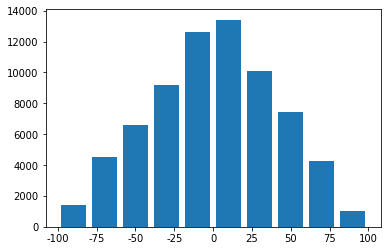

In [ ]:
temp.sort_values(by = '비만판정_차이',ascending=True)

,측정나이,측정회원성별,체지방율,분류,예측,예측값_분류,비만판정_차이,체지방율_차이
13842,17.0,F,50.0,0,13.467514,100,-100,36.532486
34578,16.0,F,51.9,0,13.432816,100,-100,38.467184
47256,15.0,F,51.7,0,11.356601,100,-100,40.343399
17580,16.0,F,50.2,0,10.055150,100,-100,40.144850
34242,17.0,F,51.5,0,9.158983,100,-100,42.341017
...,...,...,...,...,...,...,...,...
6093,14.0,M,5.1,100,40.631602,5,95,-35.531602
509,17.0,M,5.0,100,34.866592,5,95,-29.866592
39802,16.0,M,8.2,95,52.137551,0,95,-43.937551
6955,16.0,M,7.1,100,50.358152,0,100,-43.258152


(array([ 1456.,  3872.,  5253.,  6813.,  9340., 10598.,  8034.,  5932.,
         3709.,   938.]),
 array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 <a list of 10 Patch objects>)

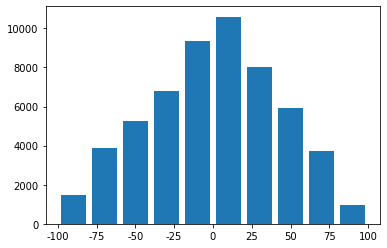

In [ ]:
plt.hist(temp['비만판정_차이'], rwidth=0.8)

(array([3.8000e+01, 6.5300e+02, 4.2520e+03, 1.0278e+04, 1.4885e+04,
        1.3841e+04, 8.5130e+03, 3.0730e+03, 3.9900e+02, 1.3000e+01]),
 array([-46.45118686, -36.87492158, -27.29865631, -17.72239103,
         -8.14612575,   1.43013952,  11.0064048 ,  20.58267007,
         30.15893535,  39.73520062,  49.3114659 ]),
 <a list of 10 Patch objects>)

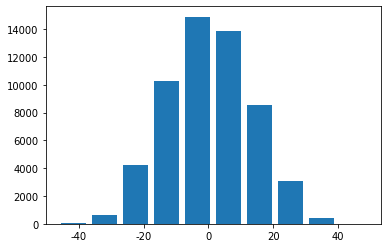

In [ ]:
plt.hist(temp['체지방율_차이'], rwidth=0.8)